<a href="https://colab.research.google.com/github/hokoro/Big-Data-Statistics-Analysis/blob/main/Statics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2차원 데이터 


In [1]:
import numpy as np 
import pandas as pd 

%precision 3 

pd.set_option('precision',3)


In [2]:
df = pd.read_csv('/content/ch2_scores_em.csv',index_col = 'student number')

In [4]:
en_score = np.array(df['english'])[:10]
ma_score = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_score , 'mathematics': ma_score} , index = pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))

scores_df


,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


- 영어 점수가 높은 학생일 수록 수학 점수도 높은 경향이 있다면 영어와 수학 점수는 양의 상관 관계 

- 영어 점수가 높은 학생 일수록 수학 점수가 낮은 경향이 있가면 영어와 수학은 음의 상관 관계 

- 영어 점수가 수학점수에 영향을 미치지 않을떄 영어와 수학 점수는 무상관 

## 공분산

- 2개의 확률 변수가 선형 관계를 나타내는 값이다 

In [5]:
cov_mat = np.cov(en_score , ma_score , ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

## 상관계수 
- 공분산의 단위는 직감적으로 이해하기 어려우므로 , 단위에 의존하지 않는 상관을 나타내는 지표 

- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음 

- 양의 상관은 1에 가까워지고 , 음의 상관으 -1 에 가까워지고 , 무상관은 0 

In [6]:
np.cov(en_score ,ma_score , ddof = 0) [0,1]

62.800

In [7]:
#상관계수 함수 
np.corrcoef(en_score , ma_score)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [8]:
#df 로 상관계수 보기 
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 산점도 

해당 데이터를 점으로 표현한 시각화 


In [9]:
import matplotlib.pyplot as plt 

%matplotlib inline

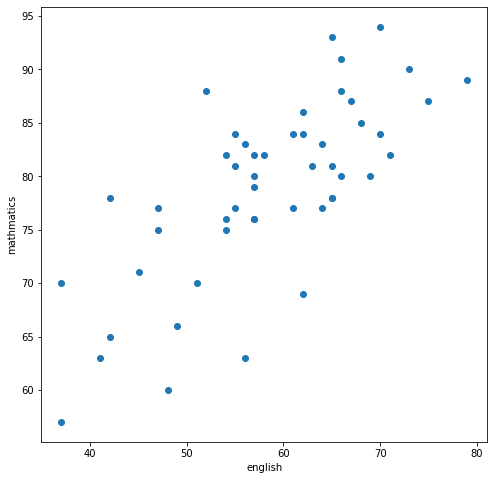

In [10]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')

plt.show()


## 회귀직선 

y = b0 + b1x 

In [11]:
poly_fit  = np.polyfit(english_scores , math_scores , 1)
print(poly_fit) # 기울기와 절편 값이 출력 

[ 0.621 42.601]


In [12]:
poly_1d = np.poly1d(poly_fit)

poly_1d

poly1d([ 0.621, 42.601])

In [13]:
xs = np.linspace(english_scores.min() , english_scores.max())
xs

array([37.   , 37.857, 38.714, 39.571, 40.429, 41.286, 42.143, 43.   ,
       43.857, 44.714, 45.571, 46.429, 47.286, 48.143, 49.   , 49.857,
       50.714, 51.571, 52.429, 53.286, 54.143, 55.   , 55.857, 56.714,
       57.571, 58.429, 59.286, 60.143, 61.   , 61.857, 62.714, 63.571,
       64.429, 65.286, 66.143, 67.   , 67.857, 68.714, 69.571, 70.429,
       71.286, 72.143, 73.   , 73.857, 74.714, 75.571, 76.429, 77.286,
       78.143, 79.   ])

In [15]:
ys = poly_1d(xs)
ys

array([65.594, 66.127, 66.659, 67.192, 67.725, 68.257, 68.79 , 69.323,
       69.855, 70.388, 70.92 , 71.453, 71.986, 72.518, 73.051, 73.584,
       74.116, 74.649, 75.182, 75.714, 76.247, 76.78 , 77.312, 77.845,
       78.378, 78.91 , 79.443, 79.975, 80.508, 81.041, 81.573, 82.106,
       82.639, 83.171, 83.704, 84.237, 84.769, 85.302, 85.835, 86.367,
       86.9  , 87.433, 87.965, 88.498, 89.031, 89.563, 90.096, 90.628,
       91.161, 91.694])

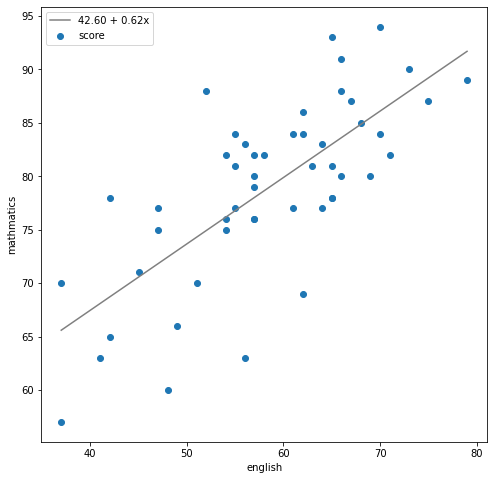

In [17]:
fig  = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label = 'score')

ax.plot(xs,ys,color = 'gray',label = f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathmatics')

ax.legend(loc = 'upper left')

plt.show()

## 히트맵 

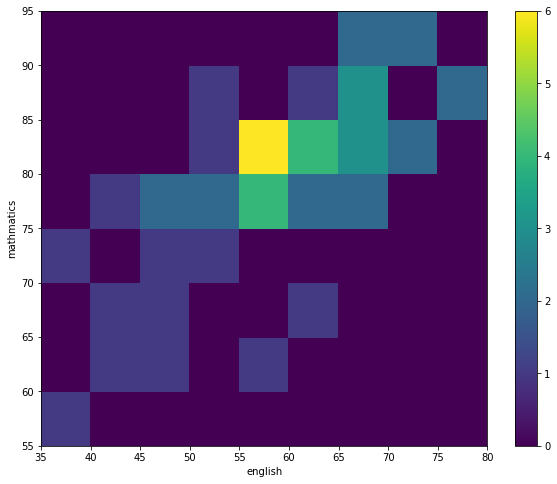

In [18]:
fig  = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores , math_scores , bins = [9,8], range = [(35,80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathmatics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax = ax)
plt.show()

색이 진할수록 많은 데이터가 분포 